# Topic: Malaria Detection Via Cell Images
## Scope: Healthcare
### Project Team: LSTM


---

Dataset can be found [here](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria).




# A. Image Analysis & Preprocessing

## 1. Load the dataset from Kaggle to Google Colab [(link)](https://www.kaggle.com/general/74235) 
Just download and add your Kaggle API Token

In [1]:
!pip install kaggle

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
# !kaggle datasets download -d nipunarora8/malaria-detection-dataset --unzip
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

 99% 670M/675M [00:16<00:00, 44.2MB/s]
100% 675M/675M [00:16<00:00, 43.3MB/s]


In [4]:
!unzip "/content/cell-images-for-detecting-malaria.zip"

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [5]:
!ls cell_images

cell_images  Parasitized  Uninfected


## 2. Importing the required libraries and modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import shutil

from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [7]:
shutil.rmtree('/content/cell_images/cell_images')

## 3. Loading the images
Printing random 5 images from each categories - Parasite & Uninfected

### Configuring the path of the categories in the dataset

In [8]:
parasitized_dir = '/content/cell_images/Parasitized'
uninfected_dir = '/content/cell_images/Uninfected'
dataset_dir = '/content/cell_images'

In [9]:
def load_random_imgs_from_folder(folder):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.xlabel(f'Image Shape: {img.shape}')
    plt.imshow(img)

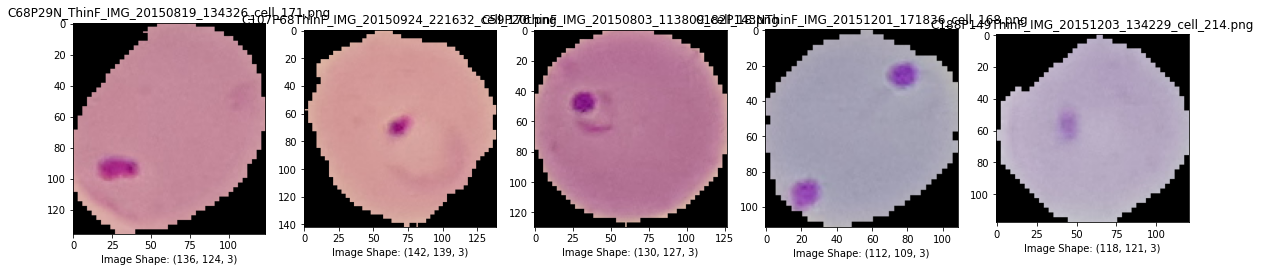

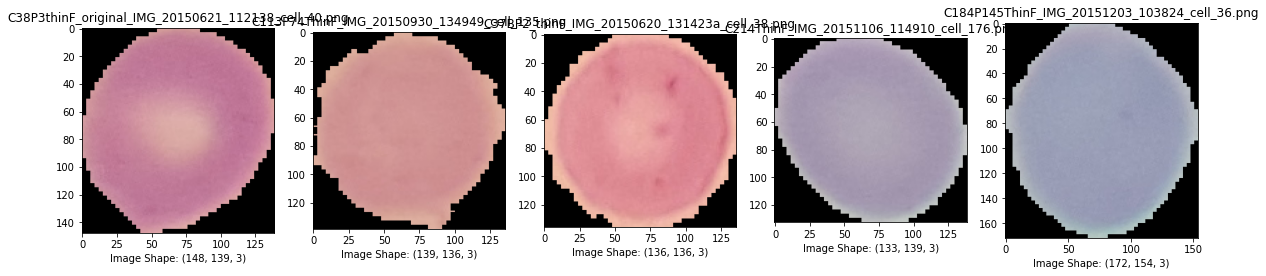

In [10]:
load_random_imgs_from_folder(parasitized_dir)
print('\n\n')
load_random_imgs_from_folder(uninfected_dir)

## 4. Renaming the datasets

In [11]:
def rename_imgs(category, path):
  # print(os.getcwd())
  os.chdir(path)
  print(os.getcwd())
  for index, filename in enumerate(os.listdir(".")):
    # print(filename, index)
    os.rename(filename, f'{category}_{index+1}.png')
    # print(filename)

In [12]:
rename_imgs('Parasitized', parasitized_dir)
rename_imgs('Uninfected', uninfected_dir)

/content/cell_images/Parasitized
/content/cell_images/Uninfected


## 5. Splitting the datasets

In [13]:
# IMG_SIZE = 64 # downscaled to fit the lowest height and width of the train images
# IMG_SIZE = 224 # usually used size for most CNN architecture
# IMG_SIZE = 128

In [14]:
def create_dataset(img_folder,IMG_SIZE=64):
  img_data_array=[]
  class_name=[]
  dataset=[]
  for dir1 in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir1)):
      image_path = os.path.join(img_folder, dir1, file)
      image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
      # print(f'{dir1}\ {file} --> {image.shape}')
      try:
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) 
        # print(f'New shape --> {image.shape}')  # Uncomment to print the new shape of the images
        image = np.array(image)
        # image = image.astype('float32')
        # image /= 255 #normalize the images
        img_data_array.append(image)
        class_name.append(dir1)
        dataset.append([file, image, dir1])
      except:
        continue
  return dataset

In [15]:
dataset = create_dataset(dataset_dir)
np.random.shuffle(dataset)

In [16]:
df = pd.DataFrame(dataset, columns=['Filename', 'Images', 'Label'])

In [17]:
df.head(5)

,Filename,Images,Label
0,Uninfected_13457.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
1,Uninfected_6192.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
2,Parasitized_2252.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Parasitized
3,Uninfected_8291.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
4,Parasitized_8420.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Parasitized


In [18]:
# Checking how many images were ignored during exception handling
df['Label'].value_counts()

Uninfected     13779
Parasitized    13779
Name: Label, dtype: int64

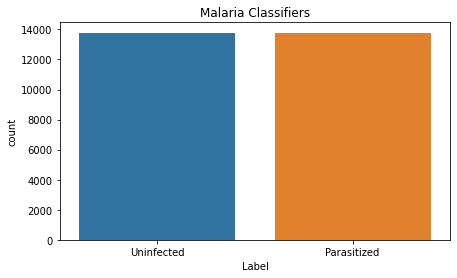

In [19]:
# plot to check the no of images ignored

plt.figure(figsize=(7,4))
sns.countplot(x=df['Label']);
plt.title('Malaria Classifiers');

In [20]:
X, test_img, Y, test_labels = train_test_split(df['Images'], df['Label'], test_size=0.2, shuffle = True, random_state = 2)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 2)

In [22]:
# checking the balance of classifiers in the y_train
y_train.value_counts()

Uninfected     8834
Parasitized    8802
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


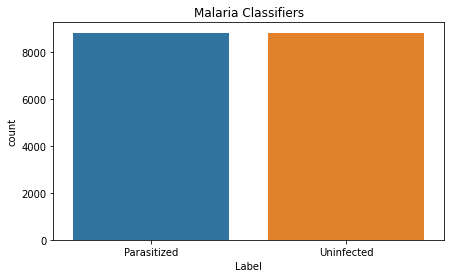

In [23]:
# plot to check the balance of classifiers in the y_train

plt.figure(figsize=(7,4))
sns.countplot(y_train);
plt.title('Malaria Classifiers');

## 6. Image Preprocessing on x_train using OpenCV

### 6.1. Normalizing training and validation dataset

In [24]:
type(x_train)

pandas.core.series.Series

In [25]:
x_train = np.array(x_train) / 255.0
y_train = np.array(y_train)
x_val = np.array(x_val) / 255.0
y_val = np.array(y_val)

In [26]:
type(x_train)

numpy.ndarray

### 6.2. Filtering noise using OpenCV

## 7. Data Augmentation